In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv
# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Function to get events
def get_FEDevents(filename, eventname, formats=['%m/%d/%Y %H:%M:%S']):
    with open(filename) as file:
        csvreader = csv.reader(file)
        next(csvreader)  # Skip header
        rows = [row for row in csvreader if row[9] == eventname]

    timestamps = [datetime.strptime(row[0], formats[0]) for row in rows]
    
    if not timestamps:
        return [], None

    refpoint = timestamps[0].replace(hour=7, minute=0, second=0, microsecond=0)
    pellettimes = [(t - refpoint).total_seconds() / 3600 for t in timestamps]

    return pellettimes, refpoint

# Load the metafile
metafile_path = "../FEDXD_METAFILE.csv"
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a list to hold results
results = []

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row[5]
    filename = f"../data/{row[3]}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints and max pellets
    breakpoints = calculate_breakpoints(df)
    max_pellets = get_max_pellets(df)
    
    for breakpoint in breakpoints:
        results.append({
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "BREAKPOINT": breakpoint,
            "MAX_PELLETS": max_pellets
        })

# Convert results to DataFrame and save
results_df = pd.DataFrame(results)
# results_df.to_csv("/mnt/data/Choice_Session_4_Breakpoints.csv", index=False)

results_df.head()
results_df

C:\Users\hta031\AppData\Local\Temp\ipykernel_68936\1499762498.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pellet_type = row[5]
C:\Users\hta031\AppData\Local\Temp\ipykernel_68936\1499762498.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filename = f"../data/{row[3]}"
C:\Users\hta031\AppData\Local\Temp\ipykernel_68936\1499762498.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pellet_type = row[5]
C:\Users\hta031\Ap

,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,BREAKPOINT,MAX_PELLETS
0,FEDXDF1,F,PR,4,CAS5,20,66
1,FEDXDF1,F,PR,4,CAS5,8,66
2,FEDXDF1,F,PR,4,CAS5,100,66
3,FEDXDF1,F,PR,4,SUC,8,33
4,FEDXDF1,F,PR,4,SUC,54,33
5,FEDXDF2,F,PR,4,CAS5,12,77
6,FEDXDF2,F,PR,4,CAS5,4,77
7,FEDXDF2,F,PR,4,CAS5,10,77
8,FEDXDF2,F,PR,4,CAS5,4,77
9,FEDXDF2,F,PR,4,CAS5,14,77


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Expand printed tables
pd.options.display.max_rows = 40000
pd.options.display.max_columns = 40000

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Function to get events
def get_FEDevents(filename, eventname, formats=['%m/%d/%Y %H:%M:%S']):
    with open(filename) as file:
        csvreader = csv.reader(file)
        next(csvreader)  # Skip header
        rows = [row for row in csvreader if row[9] == eventname]

    timestamps = [datetime.strptime(row[0], formats[0]) for row in rows]
    
    if not timestamps:
        return [], None

    refpoint = timestamps[0].replace(hour=7, minute=0, second=0, microsecond=0)
    pellettimes = [(t - refpoint).total_seconds() / 3600 for t in timestamps]

    return pellettimes, refpoint

# Load the metafile
metafile_path = "../FEDXD_METAFILE.csv"
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a list to hold results
results = []

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints and max pellets
    breakpoints = calculate_breakpoints(df)
    max_pellets = get_max_pellets(df)
    
    # Append each break point as a separate entry
    for breakpoint in breakpoints:
        results.append({
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "BREAKPOINT": breakpoint,
            "MAX_PELLETS": max_pellets
        })

# Convert results to DataFrame and save
results_df = pd.DataFrame(results)
#results_df.to_csv("/mnt/data/Choice_Session_4_Breakpoints.csv", index=False)

results_df


,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,BREAKPOINT,MAX_PELLETS
0,FEDXDF1,F,PR,4,CAS5,20,66
1,FEDXDF1,F,PR,4,CAS5,8,66
2,FEDXDF1,F,PR,4,CAS5,100,66
3,FEDXDF1,F,PR,4,SUC,8,33
4,FEDXDF1,F,PR,4,SUC,54,33
5,FEDXDF2,F,PR,4,CAS5,12,77
6,FEDXDF2,F,PR,4,CAS5,4,77
7,FEDXDF2,F,PR,4,CAS5,10,77
8,FEDXDF2,F,PR,4,CAS5,4,77
9,FEDXDF2,F,PR,4,CAS5,14,77


In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    return breakpoints

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Load the metafile
metafile_path = '../FEDXD_METAFILE.csv'
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a dictionary to hold results
results = {}

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints and max pellets
    breakpoints = calculate_breakpoints(df)
    avg_breakpoints = np.mean(breakpoints) if breakpoints else 0
    max_pellets = get_max_pellets(df)
    
    key = (mouse_id, pellet_type)
    if key not in results:
        results[key] = {
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "AVG_BREAKPOINTS": [],
            "MAX_PELLETS": max_pellets
        }
    
    results[key]["AVG_BREAKPOINTS"].append(avg_breakpoints)

# Calculate the average of average breakpoints for each mouse and pellet type
final_results = []
for key, value in results.items():
    avg_breakpoints = np.mean(value["AVG_BREAKPOINTS"])
    final_results.append({
        "MOUSEID": value["MOUSEID"],
        "SEX": value["SEX"],
        "DIET": value["DIET"],
        "CHOICE_SESSION": value["CHOICE_SESSION"],
        "PELLET_TYPE": value["PELLET_TYPE"],
        "AVG_BREAKPOINTS": avg_breakpoints,
        "MAX_PELLETS": value["MAX_PELLETS"]
    })

# Convert final results to DataFrame and save
results_df = pd.DataFrame(final_results)
#results_df.to_csv("/mnt/data/Choice_Session_4_Avg_Breakpoints.csv", index=False)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Average Break Points for Choice Session 4", dataframe=results_df)

results_df
results_df.to_csv("../results/Choice_Session_4_Avg_Breakpoints.csv", index=False)

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


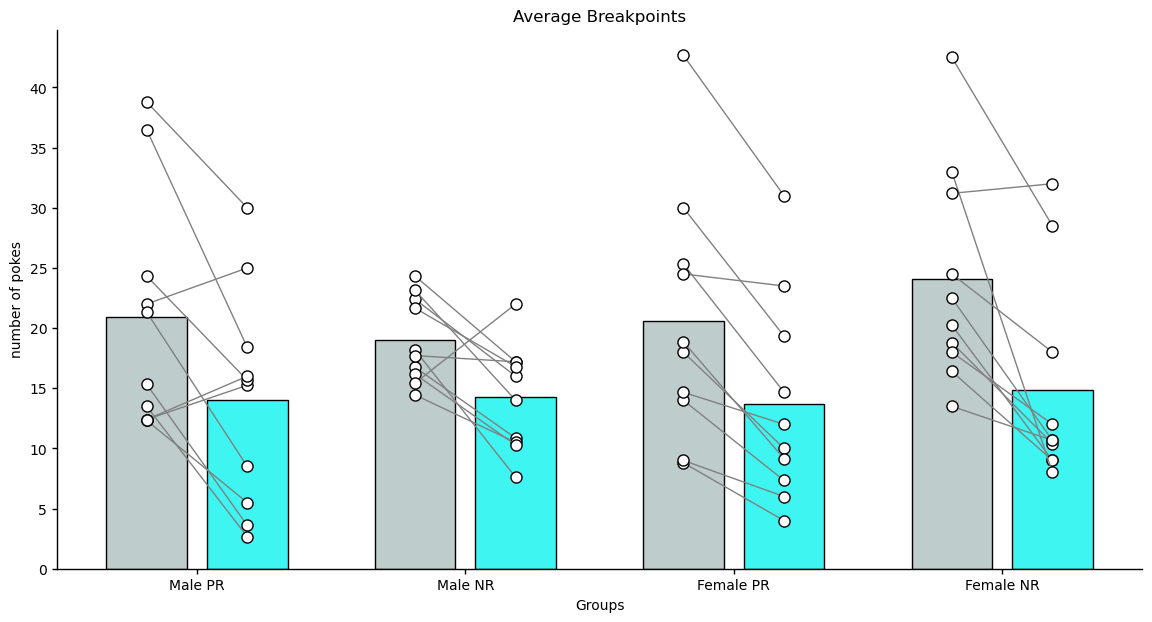

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


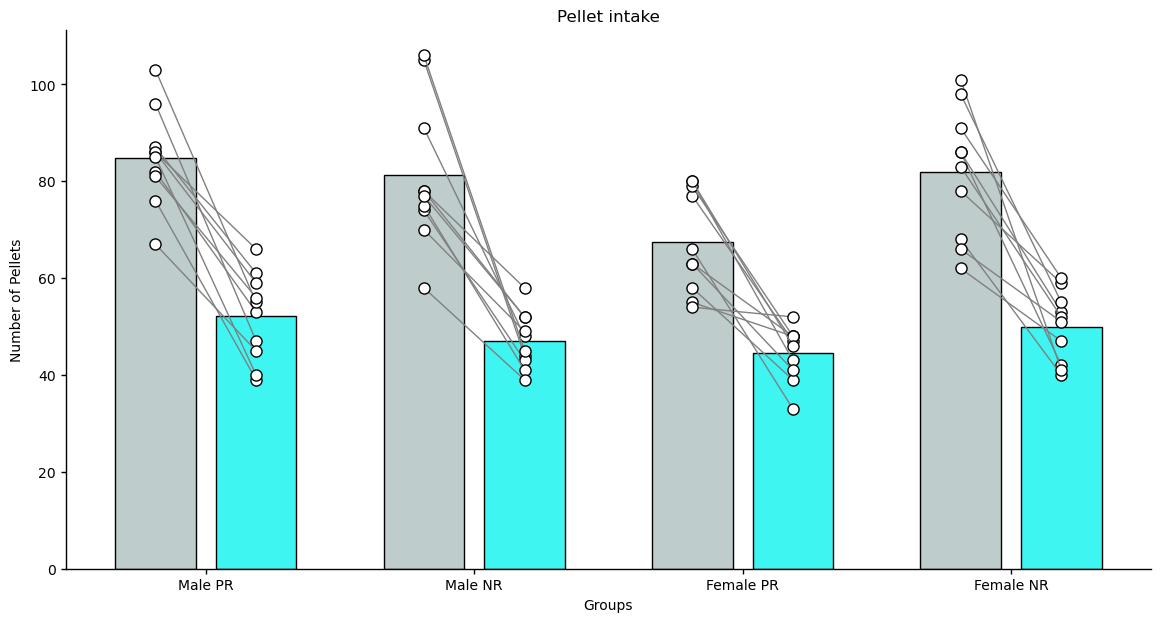

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import trompy as tp

# Load the data
file_path = '../results/Choice_Session_4_Avg_Breakpoints.csv'  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Extract the required data for plotting
def extract_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['AVG_BREAKPOINTS'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr = [extract_data('M', 'PR', 'CAS5'), extract_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr = [extract_data('M', 'NR', 'CAS5'), extract_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr = [extract_data('F', 'PR', 'CAS5'), extract_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr = [extract_data('F', 'NR', 'CAS5'), extract_data('F', 'NR', 'SUC')]

# Define the color values
high_protein_color = (0.749, 0.8, 0.8)
low_protein_color = (0.247, 0.961, 0.949)
high_protein_color_alpha = (0.749, 0.8, 0.8, 0.1)
low_protein_color_alpha = (0.247, 0.961, 0.949, 0.1)

# Plot the data for average breakpoints
f, ax = plt.subplots(figsize=(14, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr, pellet_count_group_data_male_nr, pellet_count_group_data_female_pr, pellet_count_group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color],
                                 positions=positions) 

ax.set_title('Average Breakpoints')
ax.set_xlabel('Groups')
ax.set_ylabel('number of pokes')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
plt.show()

# Extract the required data for max pellets
def extract_max_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['MAX_PELLETS'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr_max = [extract_max_data('M', 'PR', 'CAS5'), extract_max_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr_max = [extract_max_data('M', 'NR', 'CAS5'), extract_max_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr_max = [extract_max_data('F', 'PR', 'CAS5'), extract_max_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr_max = [extract_max_data('F', 'NR', 'CAS5'), extract_max_data('F', 'NR', 'SUC')]

# Plot the data for max pellets
f, ax = plt.subplots(figsize=(14, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr_max, pellet_count_group_data_male_nr_max, pellet_count_group_data_female_pr_max, pellet_count_group_data_female_nr_max],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color],
                                 positions=positions) 

ax.set_title('Pellet intake')
ax.set_xlabel('Groups')
ax.set_ylabel('Number of Pellets')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
plt.show()


# trying to calculate number of breakpoints reached before giving up and max break point


In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv

# Function to calculate breakpoints
def calculate_breakpoints(df):
    FR = df["FR"]
    breakpoints = [abs(val) for idx, val in enumerate(np.diff(FR)) if val < 0]
    num_breakpoints = len(breakpoints)
    max_breakpoint_ratio = max(breakpoints) if breakpoints else 0
    return num_breakpoints, max_breakpoint_ratio

# Function to get max pellets
def get_max_pellets(df):
    max_pellets = df["Pellet_Count"].max()
    return max_pellets

# Load the metafile
metafile_path = '../FEDXD_METAFILE.csv'
metafile = pd.read_csv(metafile_path)

# Filter for choice session 4
choice_4 = metafile[metafile['CHOICE_SESSION'] == 4]

# Initialize a dictionary to hold results
results = {}

# Iterate through the filtered rows
for _, row in choice_4.iterrows():
    mouse_id = row['MOUSEID']
    sex = row['SEX']
    diet = row['DIET']
    choice_session = row['CHOICE_SESSION']
    pellet_type = row['FED_PELLET']
    filename = f"../data/{row['FEDFILE']}"
    
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File not found: {filename}")
        continue
    
    # Calculate breakpoints, max pellets, number of breakpoints, and max breakpoint ratio
    num_breakpoints, max_breakpoint_ratio = calculate_breakpoints(df)
    max_pellets = get_max_pellets(df)
    
    key = (mouse_id, pellet_type)
    if key not in results:
        results[key] = {
            "MOUSEID": mouse_id,
            "SEX": sex,
            "DIET": diet,
            "CHOICE_SESSION": choice_session,
            "PELLET_TYPE": pellet_type,
            "NUM_BREAKPOINTS": [],
            "MAX_BREAKPOINT_RATIO": [],
            "MAX_PELLETS": max_pellets
        }
    
    results[key]["NUM_BREAKPOINTS"].append(num_breakpoints)
    results[key]["MAX_BREAKPOINT_RATIO"].append(max_breakpoint_ratio)

# Calculate the average of number of breakpoints and max breakpoint ratio for each mouse and pellet type
final_results = []
for key, value in results.items():
    avg_num_breakpoints = np.mean(value["NUM_BREAKPOINTS"])
    avg_max_breakpoint_ratio = np.mean(value["MAX_BREAKPOINT_RATIO"])
    final_results.append({
        "MOUSEID": value["MOUSEID"],
        "SEX": value["SEX"],
        "DIET": value["DIET"],
        "CHOICE_SESSION": value["CHOICE_SESSION"],
        "PELLET_TYPE": value["PELLET_TYPE"],
        "AVG_NUM_BREAKPOINTS": avg_num_breakpoints,
        "AVG_MAX_BREAKPOINT_RATIO": avg_max_breakpoint_ratio,
        "MAX_PELLETS": value["MAX_PELLETS"]
    })

# Convert final results to DataFrame and save
results_df = pd.DataFrame(final_results)
#results_df.to_csv("/mnt/data/Choice_Session_4_Avg_Breakpoints.csv", index=False)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Average Break Points for Choice Session 4", dataframe=results_df)

results_df
#results_df.to_csv("../results/Choice_Session_4_max_num_breakpoints.csv", index=False)


,MOUSEID,SEX,DIET,CHOICE_SESSION,PELLET_TYPE,AVG_NUM_BREAKPOINTS,AVG_MAX_BREAKPOINT_RATIO,MAX_PELLETS
0,FEDXDF1,F,PR,4,CAS5,3.0,100.0,66
1,FEDXDF1,F,PR,4,SUC,2.0,54.0,33
2,FEDXDF2,F,PR,4,CAS5,5.0,14.0,77
3,FEDXDF2,F,PR,4,SUC,3.0,6.0,47
4,FEDXDF3,F,PR,4,CAS5,2.0,26.0,63
5,FEDXDF3,F,PR,4,SUC,2.0,14.0,48
6,FEDXDF4,F,PR,4,CAS5,7.0,38.0,80
7,FEDXDF4,F,PR,4,SUC,7.0,22.0,43
8,FEDXDF5,F,PR,4,CAS5,2.0,24.0,55
9,FEDXDF5,F,PR,4,SUC,3.0,14.0,48


c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


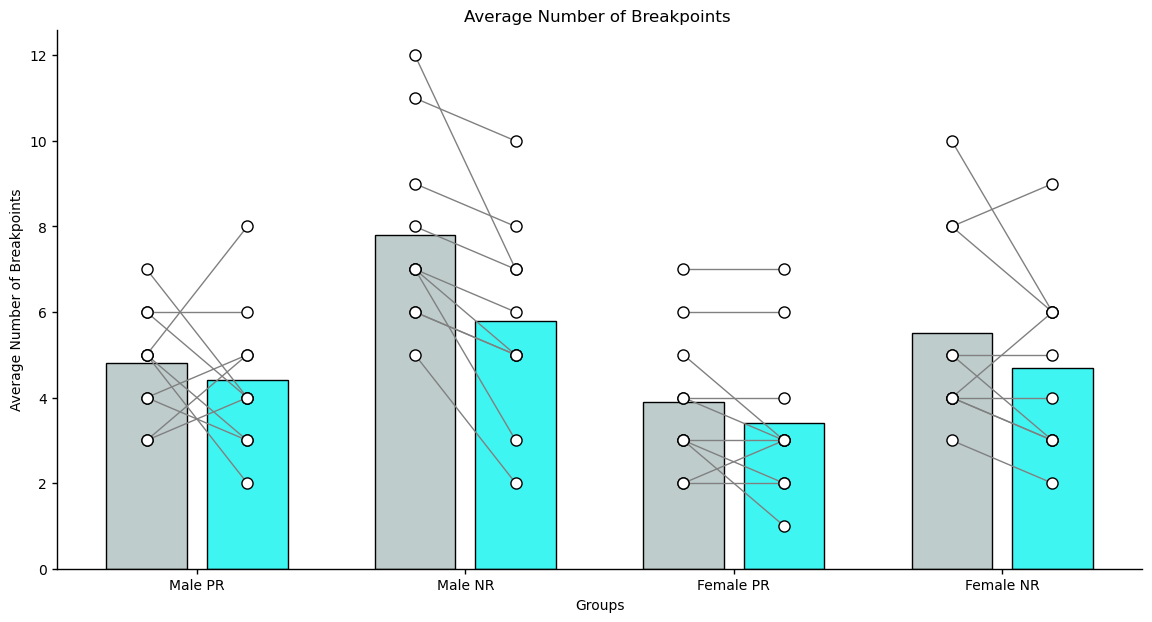

c:\Users\hta031\AppData\Local\miniconda3\envs\DATA\Lib\site-packages\trompy\barscatter.py:304: UserWarning: positions is not a functional keyword argument. Check spelling or barscatter version.
  warnings.warn("{} is not a functional keyword argument. Check spelling or barscatter version.".format(key))


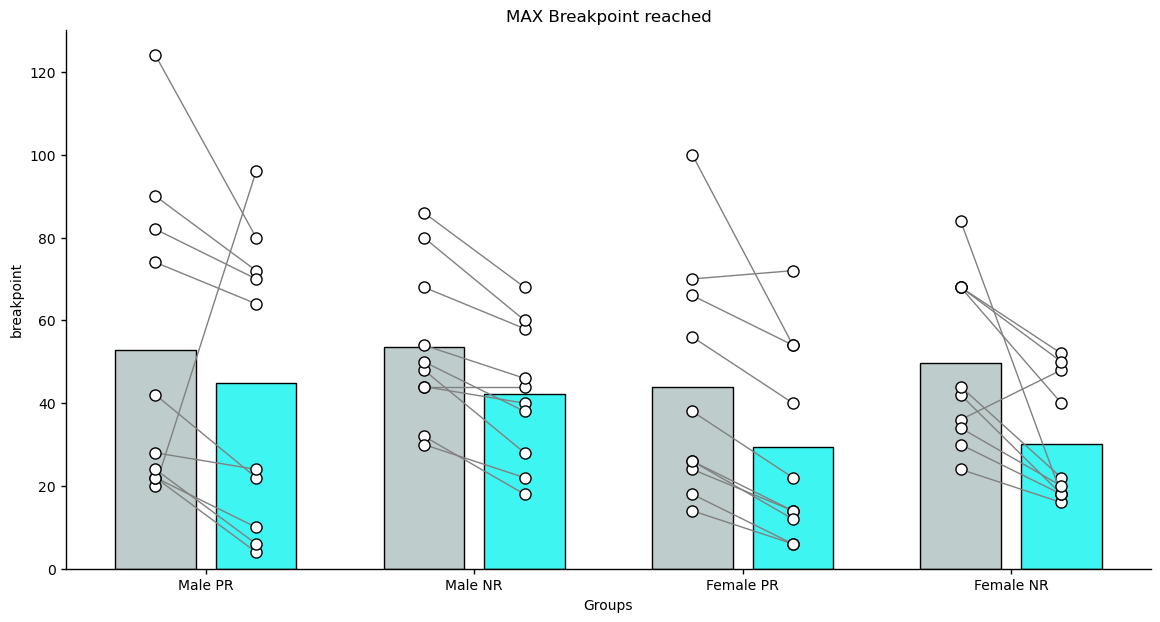

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import trompy as tp

# Load the data
file_path = '../results/Choice_Session_4_max_num_breakpoints.csv'  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Extract the required data for plotting
def extract_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['AVG_NUM_BREAKPOINTS'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr = [extract_data('M', 'PR', 'CAS5'), extract_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr = [extract_data('M', 'NR', 'CAS5'), extract_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr = [extract_data('F', 'PR', 'CAS5'), extract_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr = [extract_data('F', 'NR', 'CAS5'), extract_data('F', 'NR', 'SUC')]

# Define the color values
high_protein_color = (0.749, 0.8, 0.8)
low_protein_color = (0.247, 0.961, 0.949)
high_protein_color_alpha = (0.749, 0.8, 0.8, 0.1)
low_protein_color_alpha = (0.247, 0.961, 0.949, 0.1)

# Plot the data for average breakpoints
f, ax = plt.subplots(figsize=(14, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr, pellet_count_group_data_male_nr, pellet_count_group_data_female_pr, pellet_count_group_data_female_nr],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color],
                                 positions=positions) 

ax.set_title('Average Number of Breakpoints ')
ax.set_xlabel('Groups')
ax.set_ylabel('Average Number of Breakpoints')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
plt.show()

# Extract the required data for max pellets
def extract_max_data(sex, diet, pellet_type):
    return data[(data['SEX'] == sex) & (data['DIET'] == diet) & (data['PELLET_TYPE'] == pellet_type)]['AVG_MAX_BREAKPOINT_RATIO'].tolist()

# Group data appropriately
pellet_count_group_data_male_pr_max = [extract_max_data('M', 'PR', 'CAS5'), extract_max_data('M', 'PR', 'SUC')]
pellet_count_group_data_male_nr_max = [extract_max_data('M', 'NR', 'CAS5'), extract_max_data('M', 'NR', 'SUC')]
pellet_count_group_data_female_pr_max = [extract_max_data('F', 'PR', 'CAS5'), extract_max_data('F', 'PR', 'SUC')]
pellet_count_group_data_female_nr_max = [extract_max_data('F', 'NR', 'CAS5'), extract_max_data('F', 'NR', 'SUC')]

# Plot the data for max pellets
f, ax = plt.subplots(figsize=(14, 7))
positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]

_, _, barlist, _ = tp.barscatter([pellet_count_group_data_male_pr_max, pellet_count_group_data_male_nr_max, pellet_count_group_data_female_pr_max, pellet_count_group_data_female_nr_max],
                                 ax=ax, paired=True, linewidth=1, groupwidth=0.75,
                                 barfacecolor_option="individual",
                                 baredgecolor=["black"]*8,
                                 barfacecolor=[high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color, high_protein_color, low_protein_color],
                                 positions=positions) 

ax.set_title('MAX Breakpoint reached')
ax.set_xlabel('Groups')
ax.set_ylabel('breakpoint')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Male PR', 'Male NR', 'Female PR', 'Female NR'])
plt.show()
